# Music Genre Classification

## Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import scipy.spatial.distance
import optparse
import json
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import math

from tensorflow import keras
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import cosine
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, Lambda
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

seed = 12
np.random.seed(seed)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [108]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [6]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


index  label
0     reggae   1000
1      metal   1000
2      blues   1000
3       jazz   1000
4        pop   1000
5      disco    999
6       rock    998
7  classical    998
8     hiphop    998
9    country    997

In [7]:
audio_fp_blues = 'genres_original/blues/blues.00000.wav'
audio_data_bl, sr = librosa.load(audio_fp_blues)
audio_data_bl, _ = librosa.effects.trim(audio_data_bl)

In [8]:


audio_fp_classical = 'genres_original/classical/classical.00000.wav'
audio_data_cl, sr = librosa.load(audio_fp_classical)
audio_data_cl, _ = librosa.effects.trim(audio_data_cl)

audio_fp_country = 'genres_original/country/country.00000.wav'
audio_data_co, sr = librosa.load(audio_fp_country)
audio_data_co, _ = librosa.effects.trim(audio_data_co)

audio_fp_disco = 'genres_original/disco/disco.00000.wav'
audio_data_di, sr = librosa.load(audio_fp_disco)
audio_data_di, _ = librosa.effects.trim(audio_data_di)

audio_fp_hiphop = 'genres_original/hiphop/hiphop.00000.wav'
audio_data_hi, sr = librosa.load(audio_fp_hiphop)
audio_data_hi, _ = librosa.effects.trim(audio_data_hi)

audio_fp_jazz = 'genres_original/jazz/jazz.00000.wav'
audio_data_ja, sr = librosa.load(audio_fp_jazz)
audio_data_ja, _ = librosa.effects.trim(audio_data_ja)

audio_fp_metal = 'genres_original/metal/metal.00000.wav'
audio_data_me, sr = librosa.load(audio_fp_metal)
audio_data_me, _ = librosa.effects.trim(audio_data_me)

audio_fp_pop = 'genres_original/pop/pop.00000.wav'
audio_data_po, sr = librosa.load(audio_fp_pop)
audio_data_po, _ = librosa.effects.trim(audio_data_po)

audio_fp_reggae = 'genres_original/reggae/reggae.00000.wav'
audio_data_re, sr = librosa.load(audio_fp_reggae)
audio_data_re, _ = librosa.effects.trim(audio_data_re)

audio_fp_rock = 'genres_original/rock/rock.00000.wav'
audio_data_ro, sr = librosa.load(audio_fp_rock)
audio_data_ro, _ = librosa.effects.trim(audio_data_ro)

In [22]:
import IPython


In [26]:
# play sample file
IPython.display.Audio(audio_data_bl, rate=sr)

In [10]:
print('y:', audio_data_bl, '\n')
print('y shape:', np.shape(audio_data_bl), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

y shape: (661794,) 

Sample Rate (KHz): 22050 



In [11]:
# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

Check Len of Audio: 30.013333333333332


In [12]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file_bl, _ = librosa.effects.trim(audio_data_bl)

# the result is an numpy ndarray
print('Audio File:', audio_file_bl, '\n')
print('Audio File shape:', np.shape(audio_file_bl))

Audio File: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

Audio File shape: (661794,)


In [13]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file_cl, _ = librosa.effects.trim(audio_data_cl)

# the result is an numpy ndarray
print('Audio File:', audio_file_cl, '\n')
print('Audio File shape:', np.shape(audio_file_cl))

Audio File: [-0.02008057 -0.01748657  0.00418091 ...  0.01934814  0.027771
  0.03131104] 

Audio File shape: (661794,)


In [14]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file_ja, _ = librosa.effects.trim(audio_data_ja)

# the result is an numpy ndarray
print('Audio File:', audio_file_ja, '\n')
print('Audio File shape:', np.shape(audio_file_ja))

Audio File: [-0.00924683 -0.01177979 -0.01370239 ...  0.0071106   0.00561523
  0.00561523] 

Audio File shape: (661794,)


In [15]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file_po, _ = librosa.effects.trim(audio_data_po)

# the result is an numpy ndarray
print('Audio File:', audio_file_po, '\n')
print('Audio File shape:', np.shape(audio_file_po))

Audio File: [-0.0887146  -0.09524536 -0.10275269 ...  0.04016113  0.03860474
  0.02639771] 

Audio File shape: (661504,)


In [16]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file_re, _ = librosa.effects.trim(audio_data_re)

# the result is an numpy ndarray
print('Audio File:', audio_file_re, '\n')
print('Audio File shape:', np.shape(audio_file_re))

Audio File: [ 0.01037598  0.00775146  0.03887939 ... -0.06652832 -0.05062866
 -0.03564453] 

Audio File shape: (661794,)


Text(0.5, 1.0, 'Sound Waves in Blues 00')

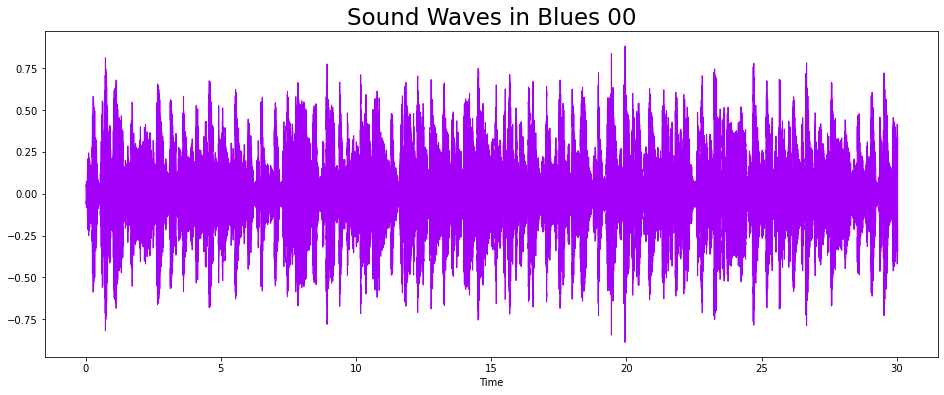

In [18]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file_bl, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Blues 00", fontsize = 23)

Text(0.5, 1.0, 'Sound Waves in Classical 00')

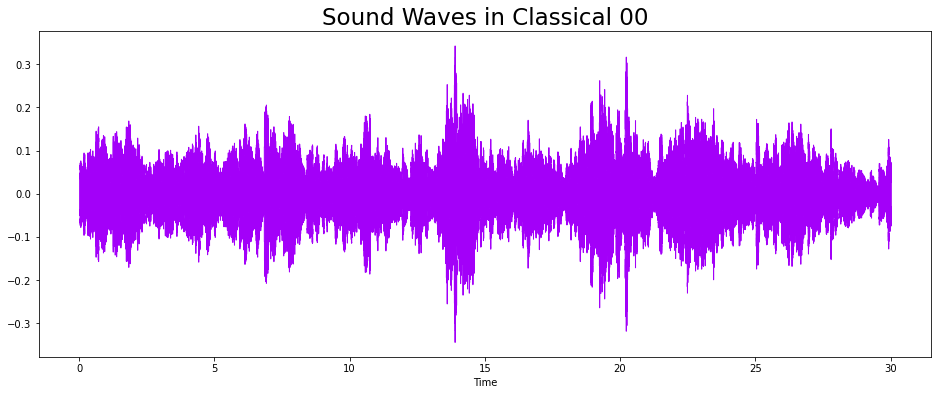

In [27]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file_cl, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Classical 00", fontsize = 23)

Text(0.5, 1.0, 'Sound Waves in Jazz 00')

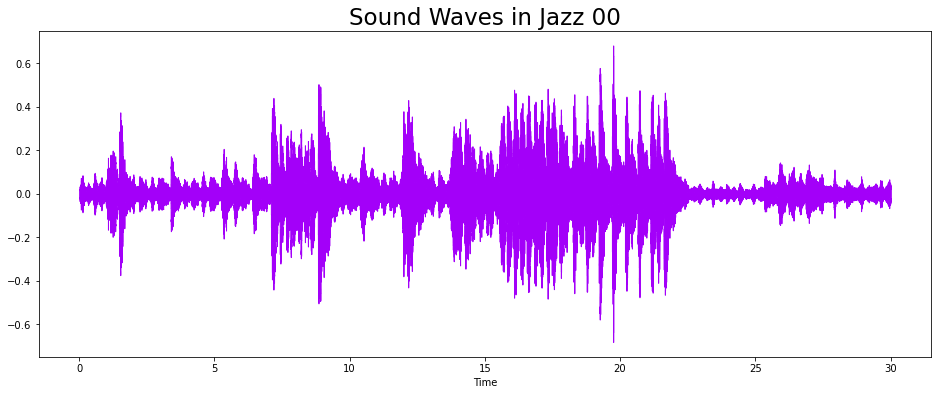

In [28]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file_ja, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Jazz 00", fontsize = 23)

Text(0.5, 1.0, 'Sound Waves in Pop 00')

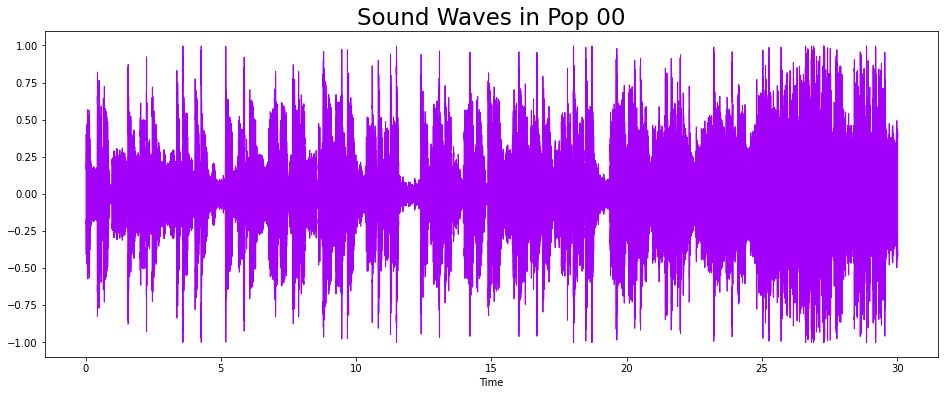

In [29]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file_po, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Pop 00", fontsize = 23)

Text(0.5, 1.0, 'Sound Waves in Reggae 00')

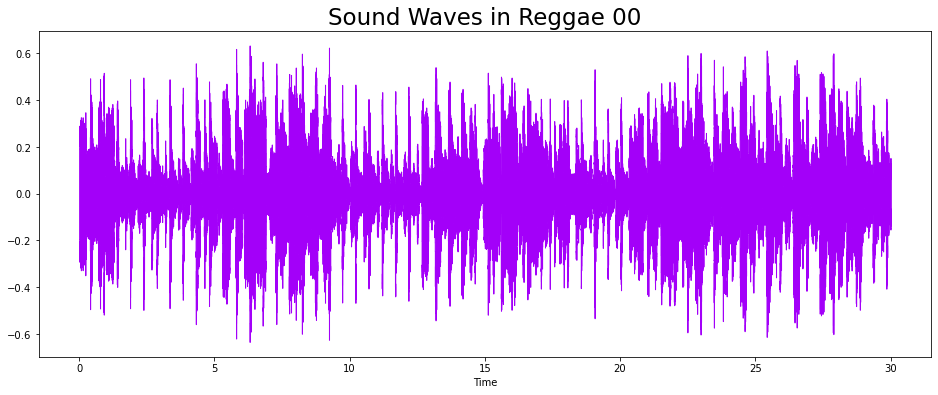

In [30]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file_re, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Reggae 00", fontsize = 23)

In [31]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_bl = np.abs(librosa.stft(audio_file_bl, n_fft = n_fft, hop_length = hop_length))

print('Shape of D_bl object:', np.shape(D_bl))

# Short-time Fourier transform (STFT)
D_cl = np.abs(librosa.stft(audio_file_cl, n_fft = n_fft, hop_length = hop_length))

print('Shape of D_cl object:', np.shape(D_cl))

# Short-time Fourier transform (STFT)
D_ja = np.abs(librosa.stft(audio_file_ja, n_fft = n_fft, hop_length = hop_length))

print('Shape of D_ja object:', np.shape(D_ja))

# Short-time Fourier transform (STFT)
D_po = np.abs(librosa.stft(audio_file_po, n_fft = n_fft, hop_length = hop_length))

print('Shape of D_po object:', np.shape(D_po))

# Short-time Fourier transform (STFT)
D_re = np.abs(librosa.stft(audio_file_re, n_fft = n_fft, hop_length = hop_length))

print('Shape of D_re object:', np.shape(D_re))

Shape of D_bl object: (1025, 1293)
Shape of D_cl object: (1025, 1293)
Shape of D_ja object: (1025, 1293)
Shape of D_po object: (1025, 1293)
Shape of D_re object: (1025, 1293)


 ...]

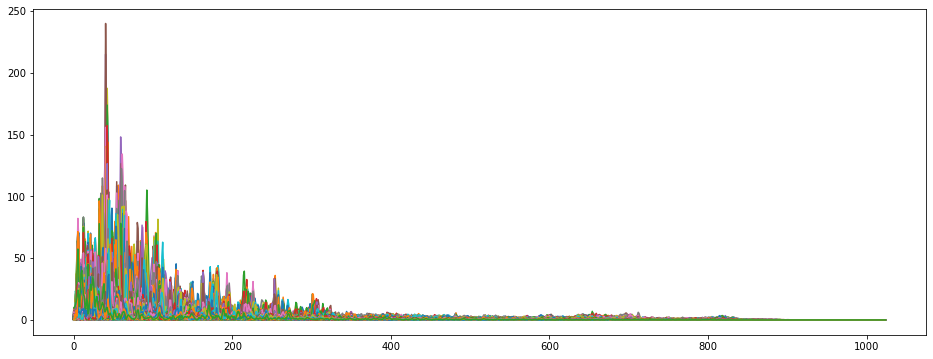

In [32]:
plt.figure(figsize = (16, 6))
plt.plot(D_bl)

 ...]

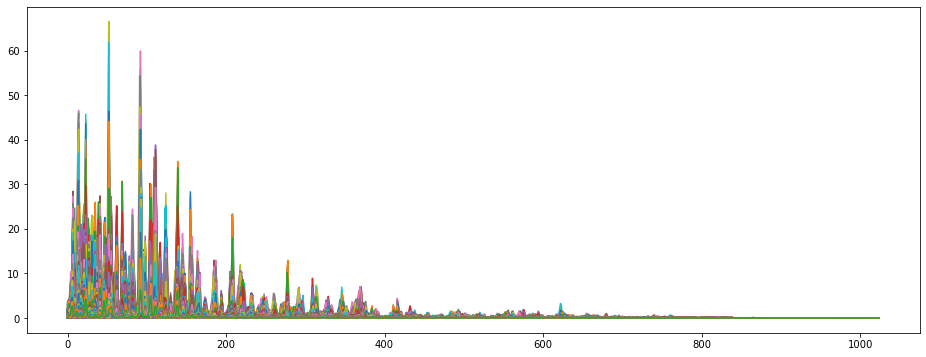

In [33]:
plt.figure(figsize = (16, 6))
plt.plot(D_cl)

 ...]

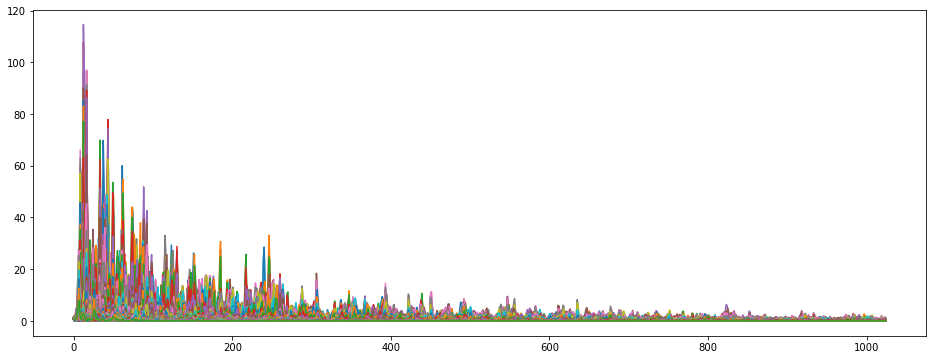

In [34]:
plt.figure(figsize = (16, 6))
plt.plot(D_ja)

 ...]

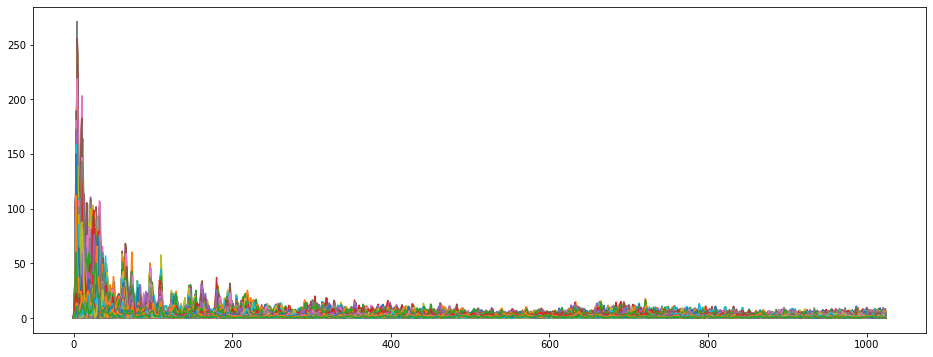

In [35]:
plt.figure(figsize = (16, 6))
plt.plot(D_po)

 ...]

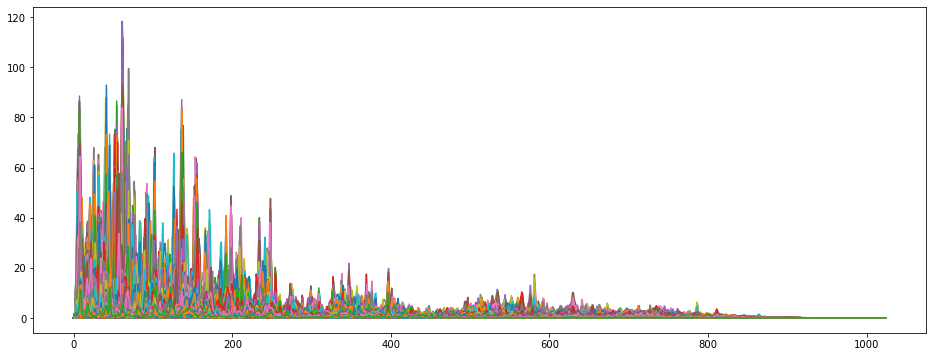

In [36]:
plt.figure(figsize = (16, 6))
plt.plot(D_re)

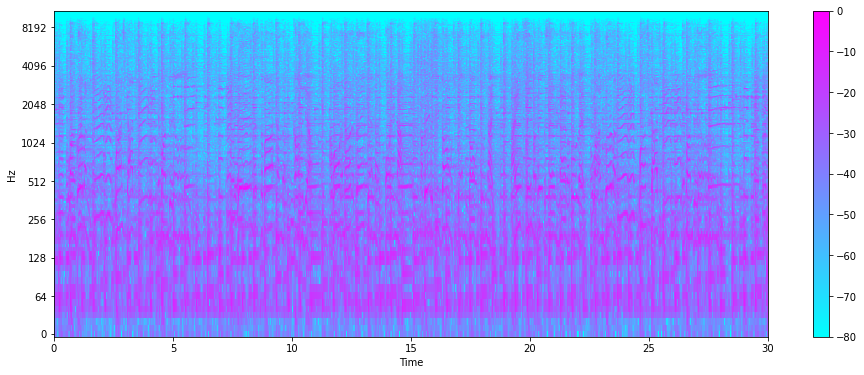

In [37]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_bl = librosa.amplitude_to_db(D_bl, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB_bl, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

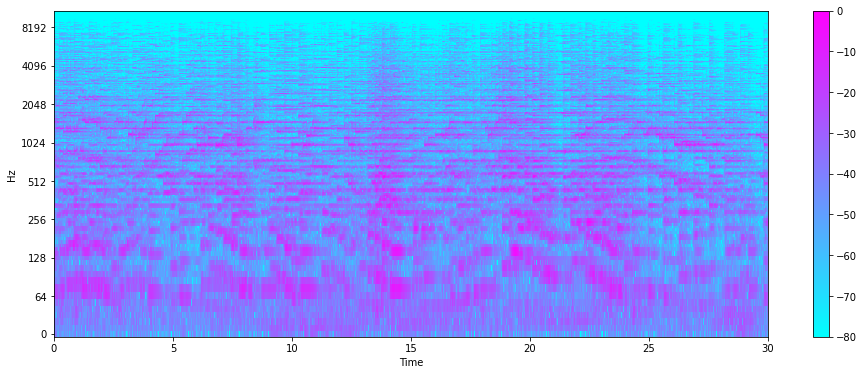

In [38]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_cl = librosa.amplitude_to_db(D_cl, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB_cl, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

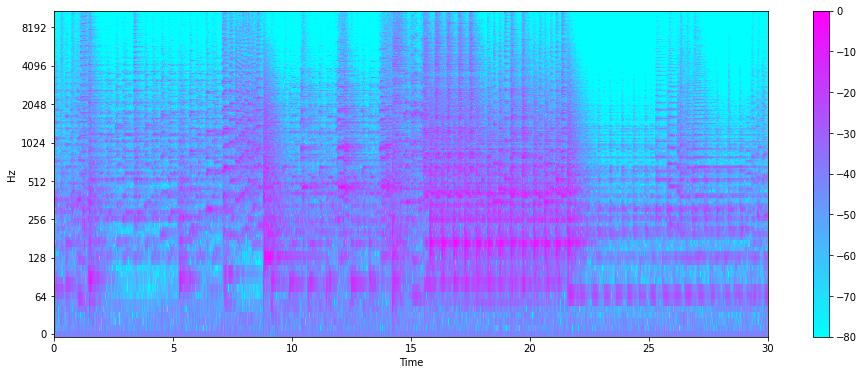

In [39]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_ja = librosa.amplitude_to_db(D_ja, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB_ja, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

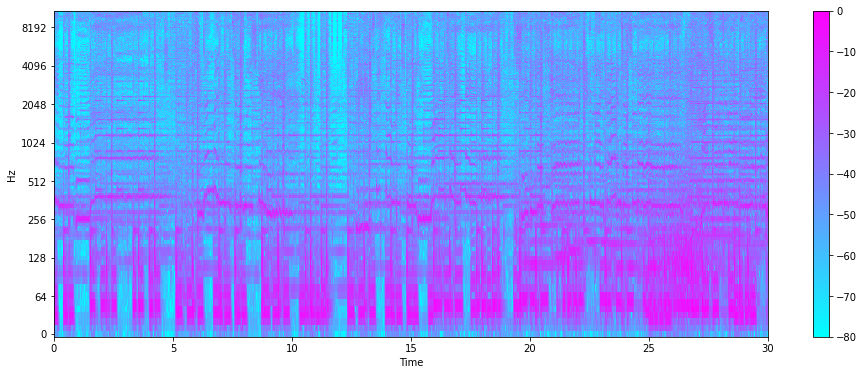

In [40]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_po = librosa.amplitude_to_db(D_po, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB_po, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

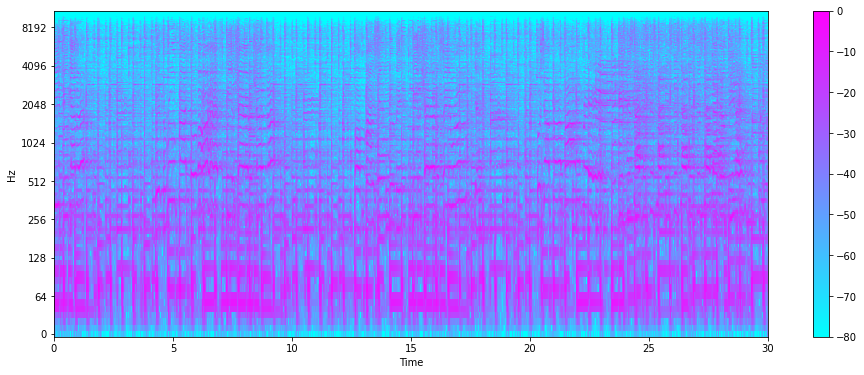

In [41]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_re = librosa.amplitude_to_db(D_re, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB_re, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

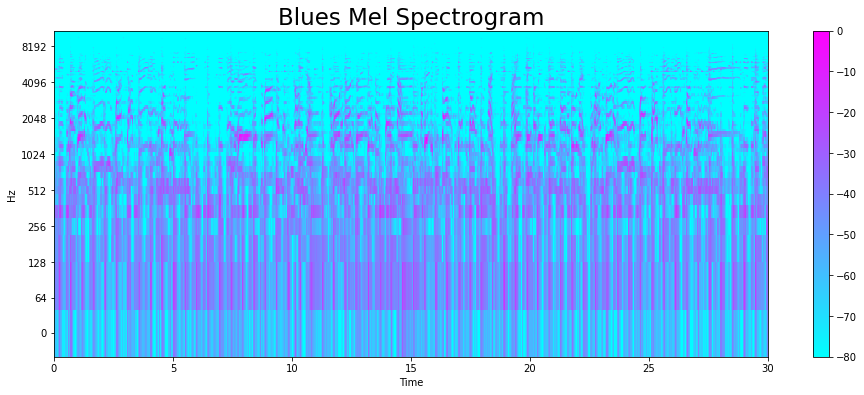

In [43]:
y, sr = librosa.load('genres_original/blues/blues.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Blues Mel Spectrogram", fontsize = 23);

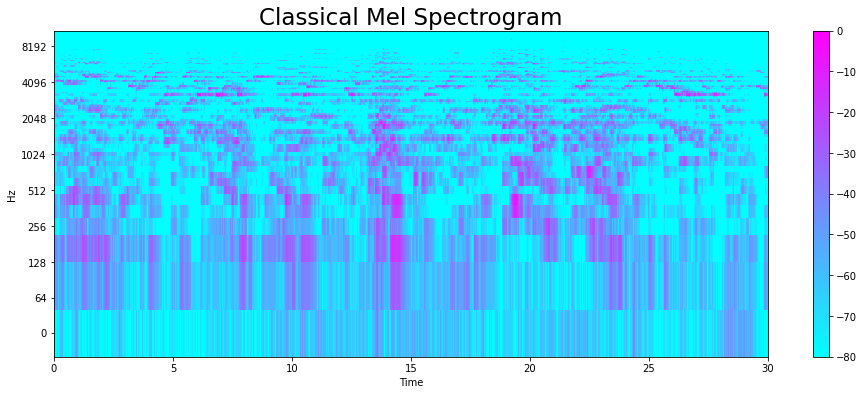

In [44]:
y, sr = librosa.load('genres_original/classical/classical.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

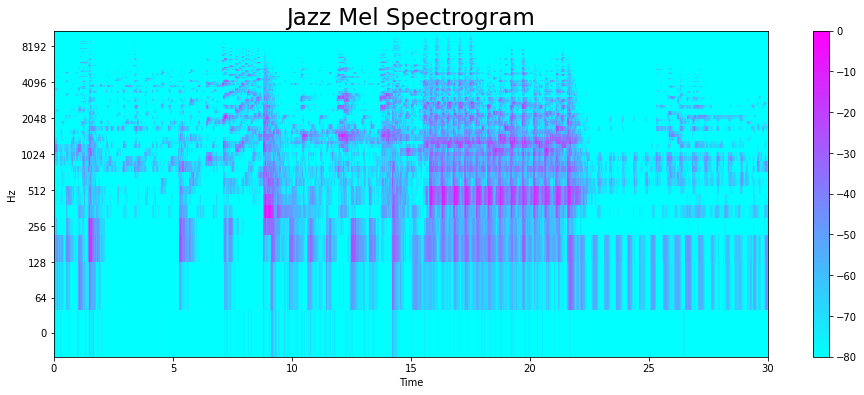

In [45]:
y, sr = librosa.load('genres_original/jazz/jazz.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Jazz Mel Spectrogram", fontsize = 23);

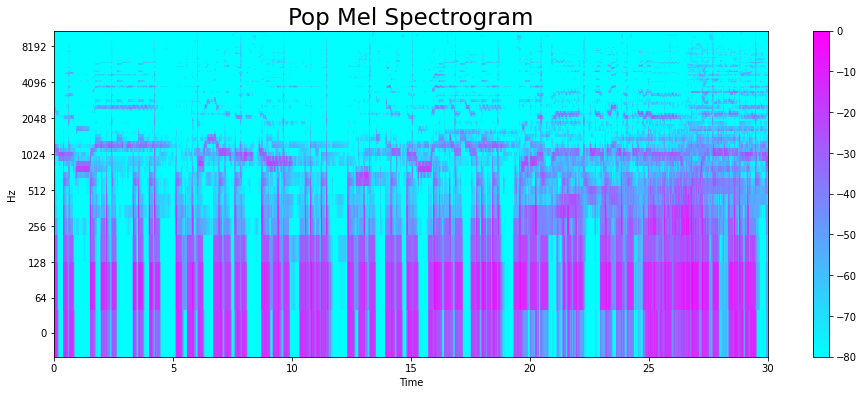

In [46]:
y, sr = librosa.load('genres_original/pop/pop.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Pop Mel Spectrogram", fontsize = 23);

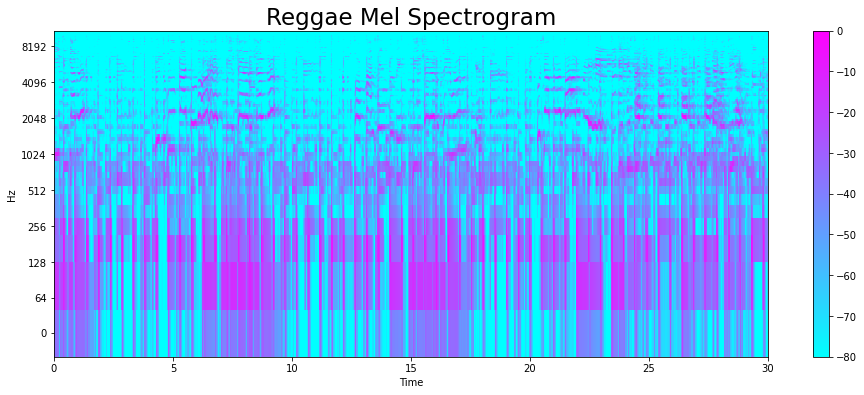

In [47]:
y, sr = librosa.load('genres_original/reggae/reggae.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Reggae Mel Spectrogram", fontsize = 23);

In [48]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file_bl, pad=False)
print(sum(zero_crossings))

55031


In [49]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file_cl, pad=False)
print(sum(zero_crossings))

65095


In [50]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file_ja, pad=False)
print(sum(zero_crossings))

51961


In [51]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file_po, pad=False)
print(sum(zero_crossings))

83949


In [52]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file_re, pad=False)
print(sum(zero_crossings))

64827


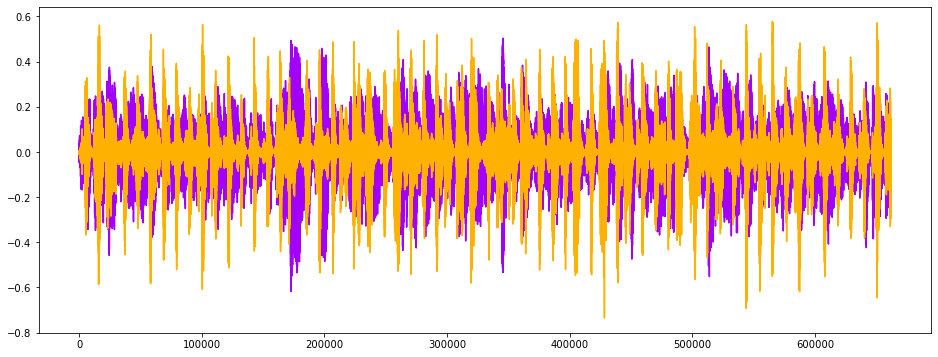

In [53]:
y_harm, y_perc = librosa.effects.hpss(audio_file_bl)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

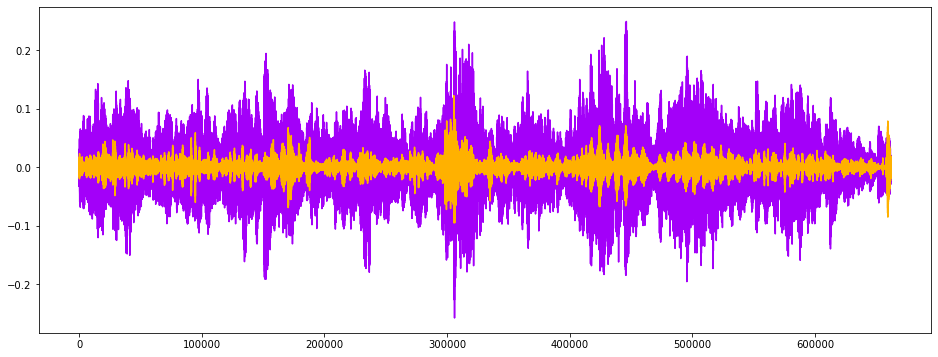

In [54]:
y_harm, y_perc = librosa.effects.hpss(audio_file_cl)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

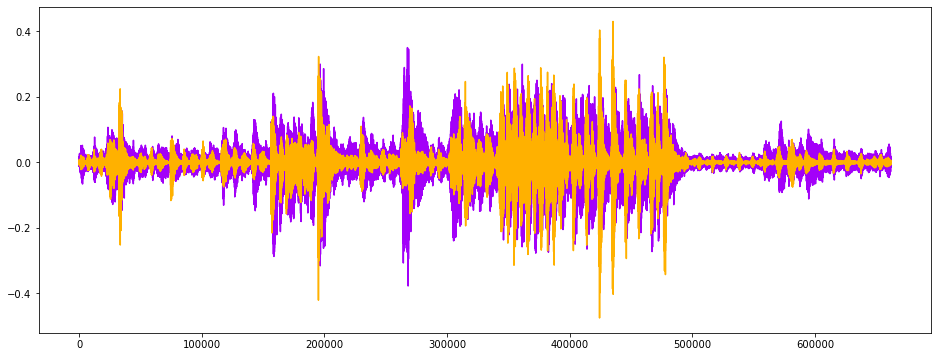

In [55]:
y_harm, y_perc = librosa.effects.hpss(audio_file_ja)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

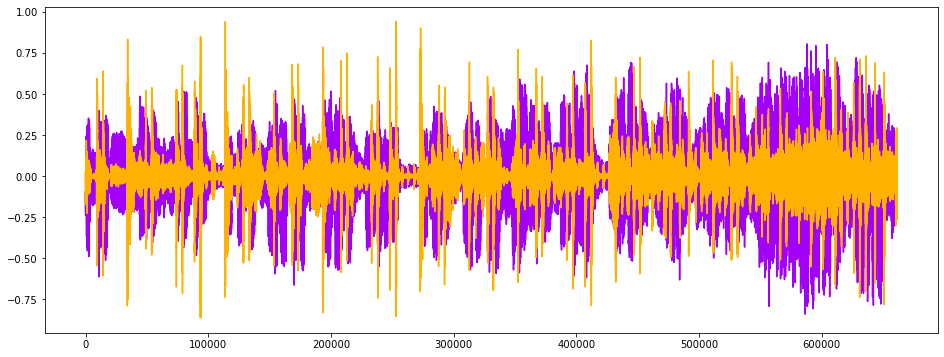

In [56]:
y_harm, y_perc = librosa.effects.hpss(audio_file_po)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

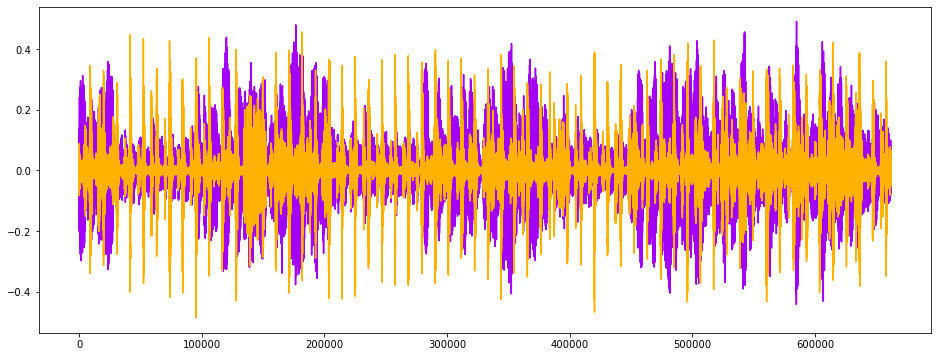

In [57]:
y_harm, y_perc = librosa.effects.hpss(audio_file_re)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

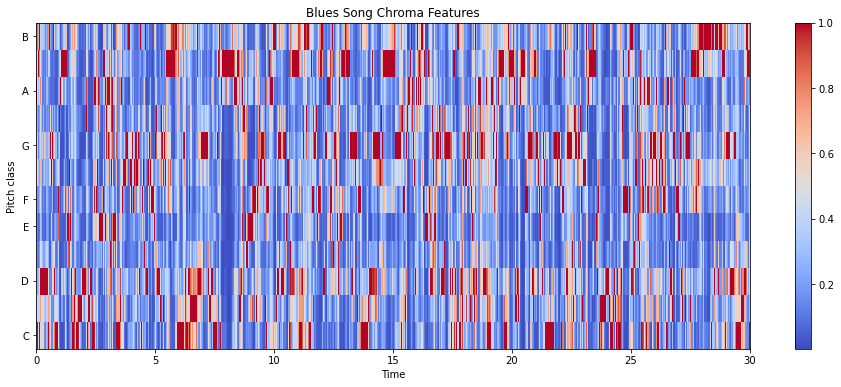

In [58]:
chroma = librosa.feature.chroma_stft(audio_data_bl, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Blues Song Chroma Features")
plt.show()

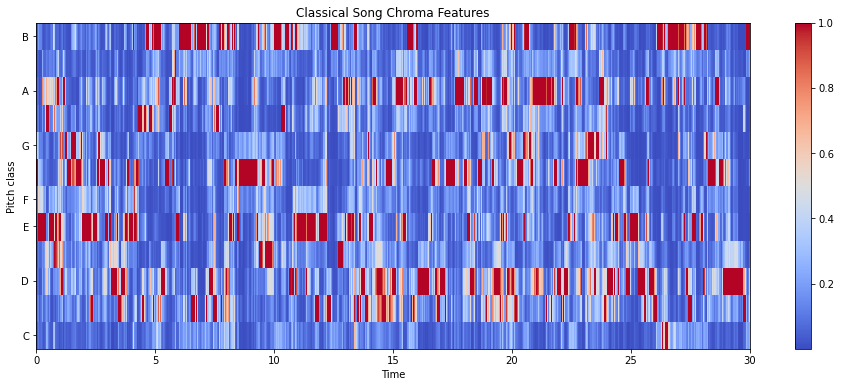

In [59]:
chroma = librosa.feature.chroma_stft(audio_data_cl, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Classical Song Chroma Features")
plt.show()

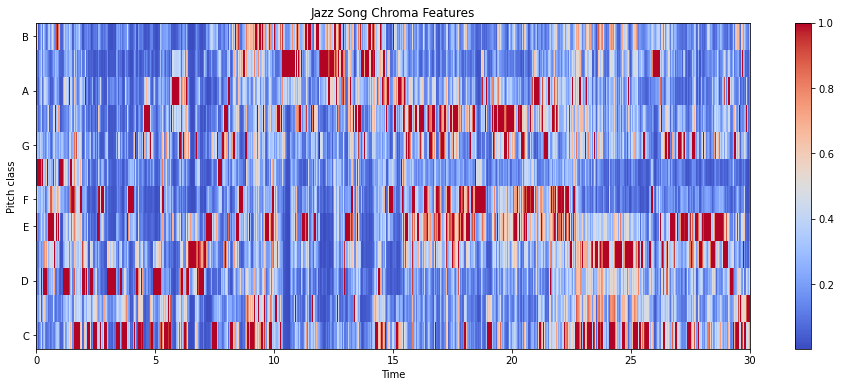

In [60]:
chroma = librosa.feature.chroma_stft(audio_data_ja, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Jazz Song Chroma Features")
plt.show()

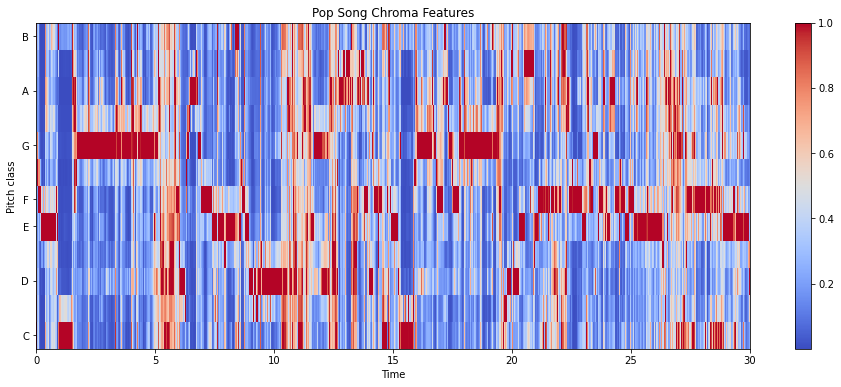

In [61]:
chroma = librosa.feature.chroma_stft(audio_data_po, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Pop Song Chroma Features")
plt.show()

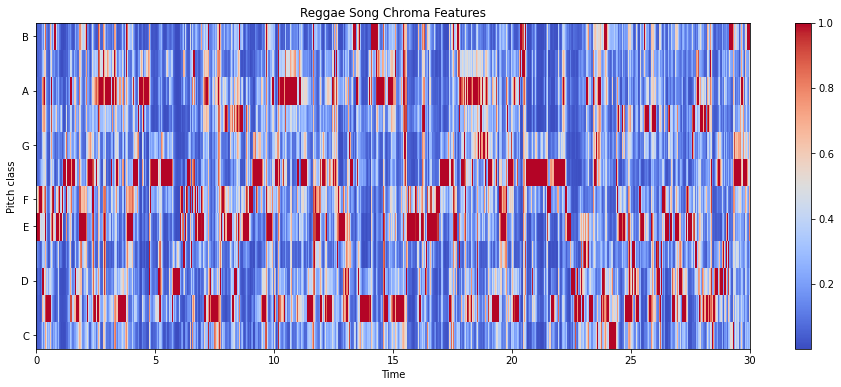

In [62]:
chroma = librosa.feature.chroma_stft(audio_data_re, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Reggae Song Chroma Features")
plt.show()

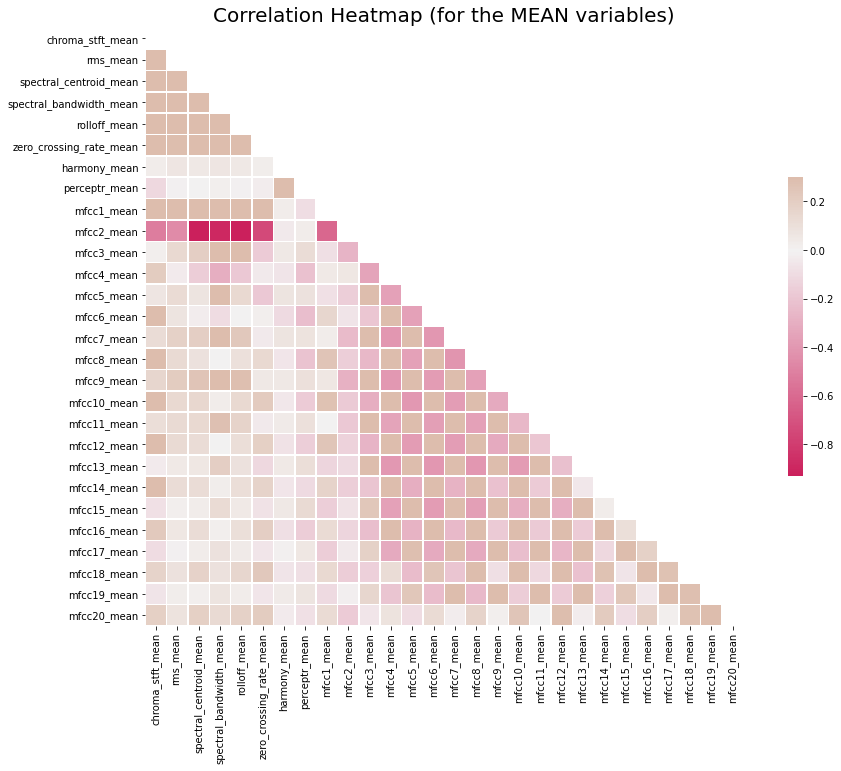

In [63]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

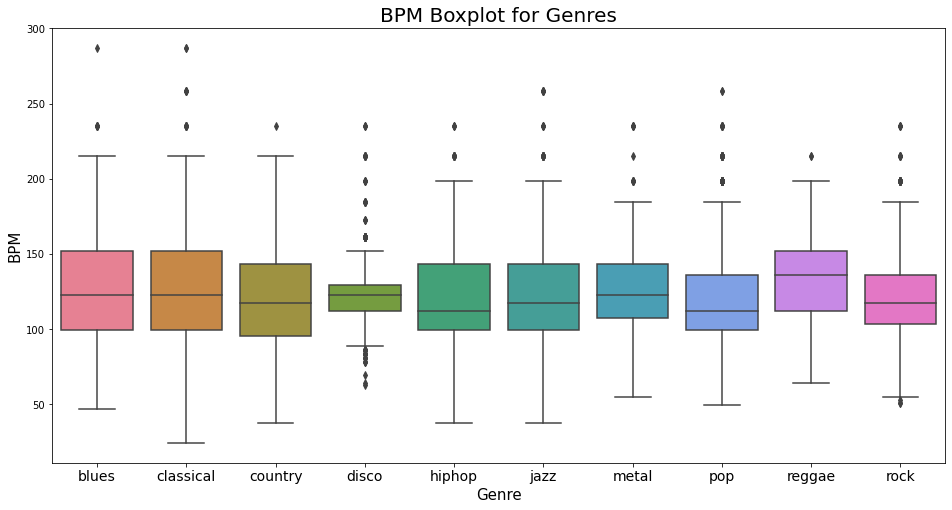

In [64]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

pc1 and pc2 variance exp, respectively: [0.26745621 0.18238003]


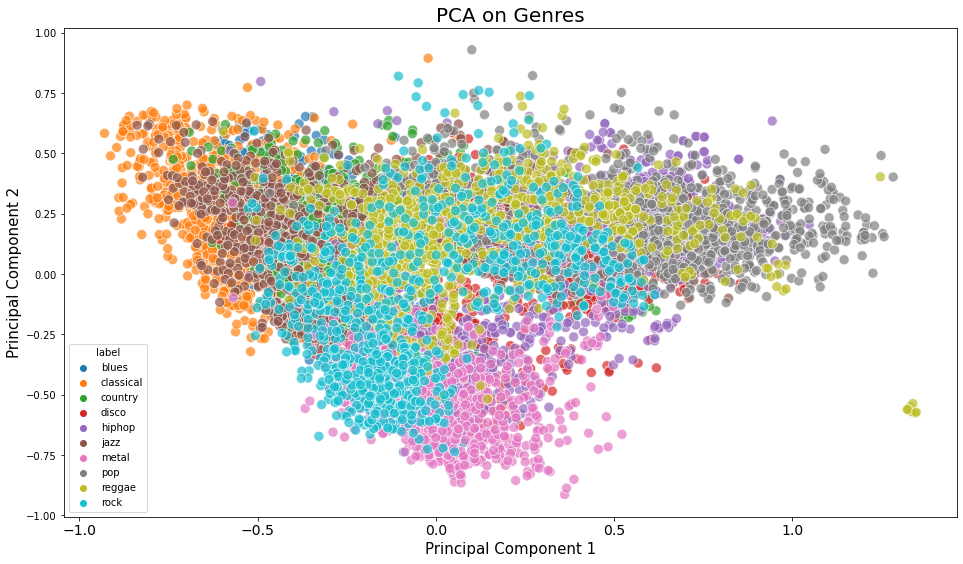

In [65]:
#@title
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print('pc1 and pc2 variance exp, respectively:', pca.explained_variance_ratio_)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

#44.98 variance explained

In [66]:
DATASET_PATH = 'genres_original/'
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
not_allowed = "jazz/jazz.00054.wav"
num_mfcc=13
n_fft=2048
hop_length=512
num_segments = 10
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

In [68]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
               
		# load audio file
                file_path = os.path.join(dirpath, f)
                if file_path != not_allowed :
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                    for d in range(num_segments):

                    # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                    # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues
genres_original/blues\blues.00000.wav, segment:1
genres_original/blues\blues.00000.wav, segment:2
genres_original/blues\blues.00000.wav, segment:3
genres_original/blues\blues.00000.wav, segment:4
genres_original/blues\blues.00000.wav, segment:5
genres_original/blues\blues.00000.wav, segment:6
genres_original/blues\blues.00000.wav, segment:7
genres_original/blues\blues.00000.wav, segment:8
genres_original/blues\blues.00000.wav, segment:9
genres_original/blues\blues.00000.wav, segment:10
genres_original/blues\blues.00001.wav, segment:1
genres_original/blues\blues.00001.wav, segment:2
genres_original/blues\blues.00001.wav, segment:3
genres_original/blues\blues.00001.wav, segment:4
genres_original/blues\blues.00001.wav, segment:5
genres_original/blues\blues.00001.wav, segment:6
genres_original/blues\blues.00001.wav, segment:7
genres_original/blues\blues.00001.wav, segment:8
genres_original/blues\blues.00001.wav, segment:9
genres_original/blues\blues.00001.wav, segment:10

In [69]:
import json
import numpy as np
DATASET_PATH = "./data_10.json"
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data = json.load(fp)
    inputs = np.array(data["mfcc"])  
    targets = np.array(data["labels"])   
    
    return inputs , targets

inputs,targets = load_data(DATASET_PATH)   

In [70]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.3)

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    
    keras.layers.Dense(10,activation="softmax"),

    
])

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=50,batch_size=32)

Epoch 1/50
219/219 [==============================] - 3s 10ms/step - loss: 9.2226 - accuracy: 0.3060 - val_loss: 4.4930 - val_accuracy: 0.3521
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 3.2949 - accuracy: 0.4166 - val_loss: 3.7115 - val_accuracy: 0.3715
Epoch 3/50
219/219 [==============================] - 2s 9ms/step - loss: 2.4022 - accuracy: 0.4704 - val_loss: 2.9293 - val_accuracy: 0.4109
Epoch 4/50
219/219 [==============================] - 2s 9ms/step - loss: 1.8365 - accuracy: 0.5382 - val_loss: 2.6420 - val_accuracy: 0.4349
Epoch 5/50
219/219 [==============================] - 2s 9ms/step - loss: 1.5094 - accuracy: 0.5848 - val_loss: 2.6470 - val_accuracy: 0.4352
Epoch 6/50
219/219 [==============================] - 2s 9ms/step - loss: 1.2627 - accuracy: 0.6265 - val_loss: 2.5081 - val_accuracy: 0.4426
Epoch 7/50
219/219 [==============================] - 2s 9ms/step - loss: 1.0755 - accuracy: 0.6724 - val_loss: 2.4029 - val_accuracy: 0.4619
Epoch

In [91]:
import matplotlib.pyplot as plt
def plot_history(history):
    
    fig,axs = plt.subplots(2)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    axs[0].plot(history.history["accuracy"],label="train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc='lower right')
    axs[0].set_title("Accuracy eval")
    
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc='upper right')
    plt.show()

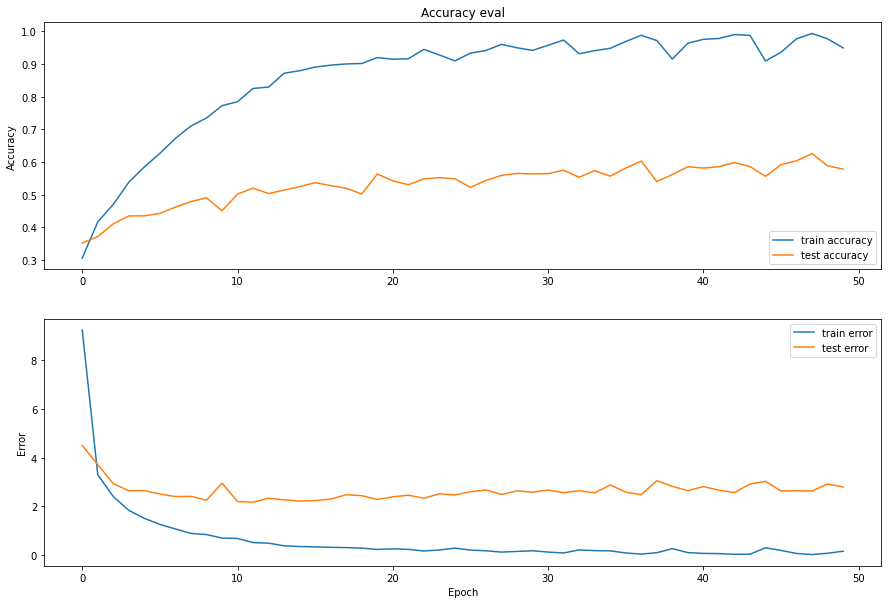

In [92]:
plot_history(history)

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation="softmax"),

    
])

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [94]:
history = model.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=50,batch_size=32)

Epoch 1/50
219/219 [==============================] - 5s 16ms/step - loss: 25.4205 - accuracy: 0.1597 - val_loss: 3.9952 - val_accuracy: 0.2440
Epoch 2/50
219/219 [==============================] - 3s 15ms/step - loss: 7.4699 - accuracy: 0.1692 - val_loss: 3.3609 - val_accuracy: 0.1752
Epoch 3/50
219/219 [==============================] - 3s 14ms/step - loss: 4.8827 - accuracy: 0.1627 - val_loss: 3.4246 - val_accuracy: 0.1515
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 4.1120 - accuracy: 0.1548 - val_loss: 3.4147 - val_accuracy: 0.1619
Epoch 5/50
219/219 [==============================] - 3s 12ms/step - loss: 3.8289 - accuracy: 0.1572 - val_loss: 3.4175 - val_accuracy: 0.1555
Epoch 6/50
219/219 [==============================] - 3s 12ms/step - loss: 3.6799 - accuracy: 0.1565 - val_loss: 3.3896 - val_accuracy: 0.1686
Epoch 7/50
219/219 [==============================] - 3s 12ms/step - loss: 3.5747 - accuracy: 0.1661 - val_loss: 3.3490 - val_accuracy: 0.186

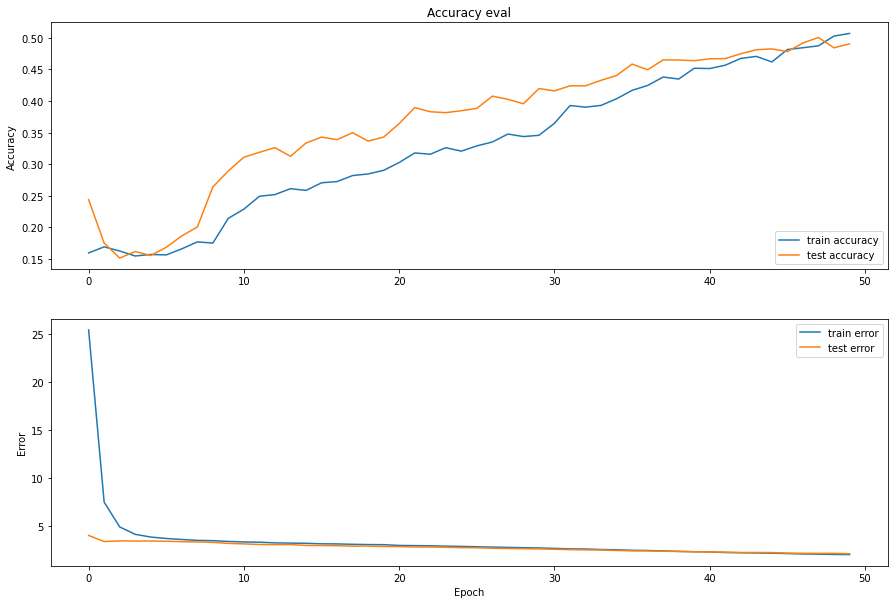

In [95]:
plot_history(history)

In [98]:
DATA_PATH = "./data_10.json"

def load_dataset(data_path):
    
    with open(data_path,"r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X , y   

In [123]:
X_train.shape

(5991, 130, 13)

In [124]:
X_test.shape

(2497, 130, 13)

In [99]:
from sklearn.model_selection import train_test_split

def prepare_datasets(test_size,val_size):
    
    X , y = load_dataset(DATA_PATH)
    X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = test_size)
    X_train,X_validation,y_train,y_validation = train_test_split(X_train , y_train , test_size = val_size)

    return X_train,X_validation,X_test,y_train,y_validation,y_test 

In [100]:
X_train,X_validation,X_test,y_train,y_validation,y_test = prepare_datasets(0.25,0.2)

In [111]:
X_train.shape

(5991, 130, 13)

In [102]:
def build_model(input_shape):
    model = keras.Sequential()
    # 64 represnets the number of units NOT cells
    # the number of cells equal to the numper of steps which is 130 here
    model.add(keras.layers.LSTM(64,input_shape=input_shape,return_sequences=True))
    model.add(keras.layers.LSTM(64))
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

In [103]:
input_shape = (X_train.shape[1],X_train.shape[2])
model = build_model(input_shape)
optimizer =  keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Epoch 1/30
188/188 [==============================] - 29s 130ms/step - loss: 1.7717 - accuracy: 0.3649 - val_loss: 1.4279 - val_accuracy: 0.4947
Epoch 2/30
188/188 [==============================] - 25s 131ms/step - loss: 1.4622 - accuracy: 0.4774 - val_loss: 1.2939 - val_accuracy: 0.5434
Epoch 3/30
188/188 [==============================] - 25s 135ms/step - loss: 1.3318 - accuracy: 0.5214 - val_loss: 1.2172 - val_accuracy: 0.5594
Epoch 4/30
188/188 [==============================] - 26s 138ms/step - loss: 1.2349 - accuracy: 0.5613 - val_loss: 1.1060 - val_accuracy: 0.6035
Epoch 5/30
188/188 [==============================] - 25s 135ms/step - loss: 1.1771 - accuracy: 0.5854 - val_loss: 1.1631 - val_accuracy: 0.5921
Epoch 6/30
188/188 [==============================] - 27s 141ms/step - loss: 1.0828 - accuracy: 0.6168 - val_loss: 1.0286 - val_accuracy: 0.6435
Epoch 7/30
188/188 [==============================] - 25s 136ms/step - loss: 1.0268 - accuracy: 0.6355 - val_loss: 1.0115 - val_ac

In [106]:
test_error , test_accuracy = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test is {}".format(test_accuracy))
print("Test error is {}".format(test_error))

79/79 [==============================] - 4s 49ms/step - loss: 0.7756 - accuracy: 0.7733
Accuracy on test is 0.7733280062675476
Test error is 0.775565505027771


Epoch 1/30
188/188 [==============================] - 25s 129ms/step - loss: 0.3017 - accuracy: 0.9000 - val_loss: 0.8149 - val_accuracy: 0.7717
Epoch 2/30
188/188 [==============================] - 28s 147ms/step - loss: 0.2852 - accuracy: 0.9054 - val_loss: 0.8263 - val_accuracy: 0.7677
Epoch 3/30
188/188 [==============================] - 30s 160ms/step - loss: 0.2814 - accuracy: 0.9057 - val_loss: 0.8412 - val_accuracy: 0.7610
Epoch 4/30
188/188 [==============================] - 30s 160ms/step - loss: 0.2887 - accuracy: 0.9050 - val_loss: 0.7756 - val_accuracy: 0.7830
Epoch 5/30
188/188 [==============================] - 27s 142ms/step - loss: 0.2683 - accuracy: 0.9144 - val_loss: 0.8109 - val_accuracy: 0.7750
Epoch 6/30
188/188 [==============================] - 33s 175ms/step - loss: 0.3270 - accuracy: 0.8952 - val_loss: 0.7660 - val_accuracy: 0.7830
Epoch 7/30
188/188 [==============================] - 31s 163ms/step - loss: 0.2313 - accuracy: 0.9217 - val_loss: 0.7508 - val_ac

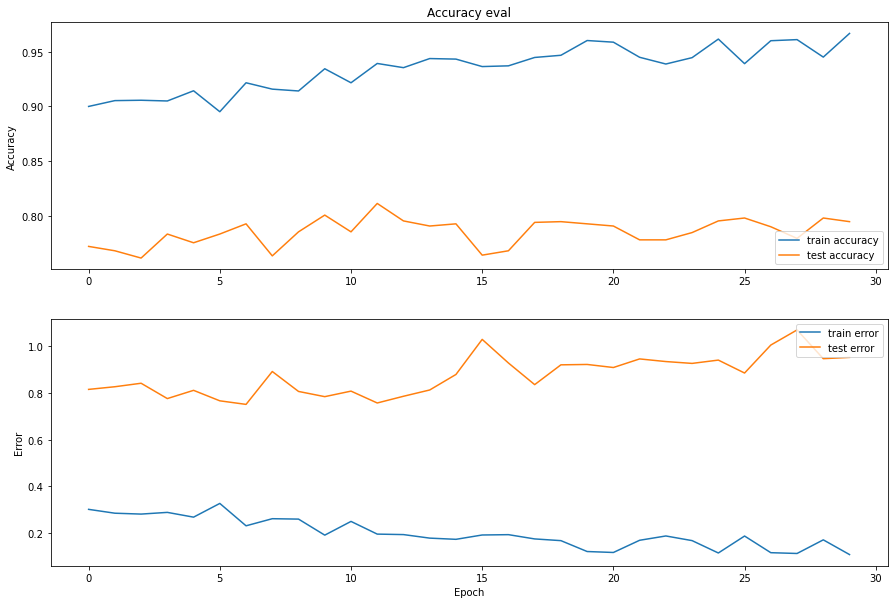

In [107]:
plot_history(model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30))

In [132]:
def build_model(input_shape):
    model = keras.Sequential()
    # 64 represnets the number of units NOT cells
    # the number of cells equal to the numper of steps which is 130 here
    model.add(keras.layers.LSTM(128,input_shape=input_shape,return_sequences=True))
    model.add(keras.layers.LSTM(128))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

In [133]:
input_shape = (X_train.shape[1],X_train.shape[2])
model = build_model(input_shape)
optimizer =  keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [134]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 130, 128)          72704     
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 229,706
Trainable params: 229,706
Non-trainable params: 0
________________________________________________

Epoch 1/50
188/188 [==============================] - 65s 279ms/step - loss: 1.6264 - accuracy: 0.4138 - val_loss: 1.2878 - val_accuracy: 0.5387
Epoch 2/50
188/188 [==============================] - 53s 282ms/step - loss: 1.3105 - accuracy: 0.5285 - val_loss: 1.2634 - val_accuracy: 0.5240
Epoch 3/50
188/188 [==============================] - 53s 284ms/step - loss: 1.1983 - accuracy: 0.5662 - val_loss: 1.1113 - val_accuracy: 0.6048
Epoch 4/50
188/188 [==============================] - 56s 299ms/step - loss: 1.0854 - accuracy: 0.6092 - val_loss: 1.0580 - val_accuracy: 0.6248
Epoch 5/50
188/188 [==============================] - 56s 297ms/step - loss: 1.0159 - accuracy: 0.6340 - val_loss: 1.0830 - val_accuracy: 0.6088
Epoch 6/50
188/188 [==============================] - 55s 293ms/step - loss: 0.9506 - accuracy: 0.6662 - val_loss: 0.9413 - val_accuracy: 0.6789
Epoch 7/50
188/188 [==============================] - 54s 288ms/step - loss: 0.8485 - accuracy: 0.7001 - val_loss: 0.8942 - val_ac

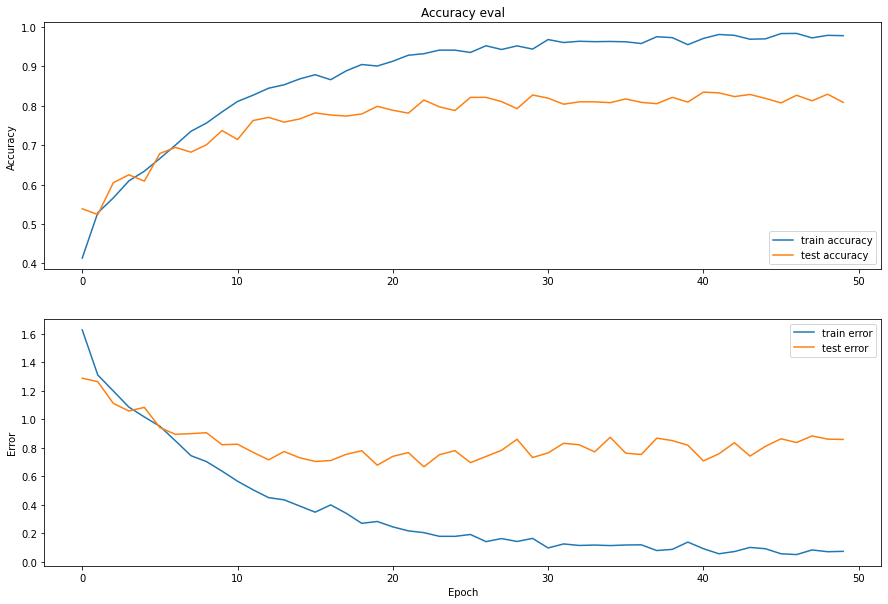

In [135]:
plot_history(model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=50))

In [136]:
test_error , test_accuracy = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test is {}".format(test_accuracy))
print("Test error is {}".format(test_error))

79/79 [==============================] - 8s 100ms/step - loss: 0.8868 - accuracy: 0.8130
Accuracy on test is 0.8129755854606628
Test error is 0.8867654800415039


In [141]:
def build_model(input_shape):
    model = keras.Sequential()
    # 64 represnets the number of units NOT cells
    # the number of cells equal to the numper of steps which is 130 here
    model.add(keras.layers.LSTM(128,input_shape=input_shape,return_sequences=True))
    model.add(keras.layers.LSTM(128))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

In [142]:
input_shape = (X_train.shape[1],X_train.shape[2])
model_2 = build_model(input_shape)
optimizer =  keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer = optimizer ,loss = 'categorical_crossentropy',metrics=['categorical accuracy'])

In [143]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 130, 128)          72704     
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 229,706
Trainable params: 229,706
Non-trainable params: 0
________________________________________________

In [145]:
X_train.shape[1]

130

In [146]:
X_train.shape[2]

13

In [144]:
plot_history(model_2.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=50))

Epoch 1/50


ValueError: in user code:

    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Matt\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [149]:
input_shape = (X_train.shape[1],X_train.shape[2])
model_3 = build_model(input_shape)
optimizer =  keras.optimizers.Adam(learning_rate=0.001)
model_3.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy',metrics=['categorical_accuracy'])

Epoch 1/50
188/188 [==============================] - 53s 255ms/step - loss: 1.6245 - categorical_accuracy: 0.1175 - val_loss: 1.3192 - val_categorical_accuracy: 0.2363
Epoch 2/50
188/188 [==============================] - 50s 264ms/step - loss: 1.2839 - categorical_accuracy: 0.1143 - val_loss: 1.1367 - val_categorical_accuracy: 0.1475
Epoch 3/50
188/188 [==============================] - 50s 265ms/step - loss: 1.1475 - categorical_accuracy: 0.1163 - val_loss: 1.0641 - val_categorical_accuracy: 0.0447
Epoch 4/50
188/188 [==============================] - 51s 270ms/step - loss: 1.0231 - categorical_accuracy: 0.1120 - val_loss: 1.0572 - val_categorical_accuracy: 0.0834
Epoch 5/50
188/188 [==============================] - 51s 271ms/step - loss: 0.9101 - categorical_accuracy: 0.1137 - val_loss: 0.9540 - val_categorical_accuracy: 0.0848
Epoch 6/50
188/188 [==============================] - 51s 271ms/step - loss: 0.8264 - categorical_accuracy: 0.1100 - val_loss: 0.9254 - val_categorical_acc

KeyError: 'accuracy'

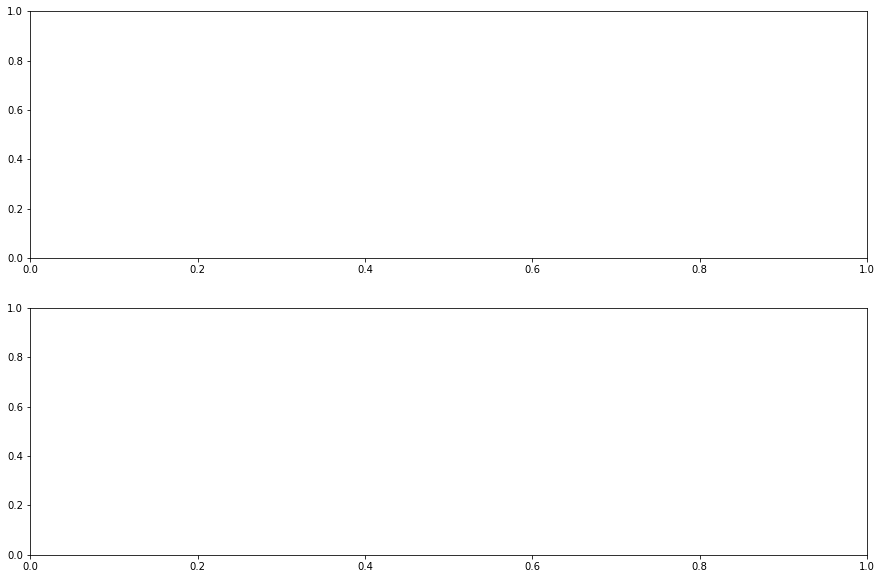

In [150]:
plot_history(model_3.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=50))